# Studienarbeit: Machine Learning
#### Saniye Ogul und Johannes Horst

### Imports
- plotly
- matplotlib
- pandas
- numpy
- scikit-learn

In [6]:
# Importe
import pandas as pd
import numpy as np
import plotly.express as px
#%matplotlib widget
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#import graphviz
from sklearn import tree
from matplotlib.dates import DateFormatter
import datetime as dt
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Aufgabe 1 (Klassifikation des Systemzustands)
Erstellung eines binären Klassifikationsmodell zur Vorhersage des aktuellen Zutands der APU (Air Production Unit) auf Basis der Sensordaten. Soll differenziert werden ob APU in Ordnung oder nicht ist (binäre Klassifikation)
zu verwendene Verfahren:
- einen nicht-parametrisierten Modellansatz,
- einen parametrisierten Modellansatz,
- ein Verfahren aus dem Bereich des Ensemble Learning.

Trainigsdatensatz erstellen z.B. durch geeignete Datentransformationen, Feature Engineering und ggf. Feature Extraction. Sequentielle Struktur der Daten soll berücksichtigt werden.
Wenden Sie zur Modellerstellung (in dieser und den folgenden Aufgaben) geeignete Maßnahmen und Techniken an, damit die resultierenden Modelle eine moglichst hohe Gute aufweisen und beurteilen Sie diese anhand geeigneter Kriterien. Modularisieren und automatisieren Sie Ihren Workflow, damit die einzelnen Schritte in den folgenden Aufgaben ggf.
wiederverwendet werden konnen. Achten Sie darauf, dass Ihre Modelle auf unbekannte Daten angewendet werden konnen, die ggf. fehlende Werte enthalten, auch wenn der gegebene Datensatz keine fehlenden Werte enthalt. Welche Features erweisen sich als besonders aussagekräftig für die gegebene Aufgabenstellung?

- **TP2** - Druck am Kompressor (bar).
- **TP3** - An der Pneumatikzentrale erzeugter Druck (bar).
- **H1** - Ventil, das aktiviert wird, wenn der vom Druckschalter der Steuerung abgelesene Druck über dem Betriebsdruck von 10,2 bar (bar) liegt.
- **DV_pressure** - Druck, der durch den Druckabfall entsteht, wenn die Lufttrockentürme das Wasser. Wenn er gleich Null ist, arbeitet der Kompressor unter Last (bar).
- **Reservoirs** - Druck in den auf den Zügen installierten Luftbehältern (bar).
- **Oil_Temperature** - Temperatur des im Kompressor vorhandenen Öls (°C).
- **Durchflussmesser** - Der Luftdurchfluss wurde an der pneumatischen Schalttafel gemessen (m^3
/h).
- **Motor_Current** - Strom des Motors, der die folgenden Werte aufweisen sollte: (i) nahe 0 A, wenn der (ii) nahe bei 4 A, wenn der Kompressor im Leerlauf arbeitet, und (iii) nahe bei 7 A, wenn der Kompressor der Kompressor unter Last arbeitet (A);
- **COMP** - Elektrisches Signal des Lufteinlassventils des Kompressors. Es ist aktiv, wenn der Kompressor keine Luft ansaugt am Kompressor, d.h. der Kompressor schaltet ab oder arbeitet entlastet.
- **DV_electric** - Elektrisches Signal, das das Auslassventil des Verdichters steuert. Wenn es aktiv ist, bedeutet es, dass der Kompressor unter Last arbeitet, wenn es nicht aktiv ist, bedeutet es, dass der Kompressor ausgeschaltet oder entlastet ist.
- **TOWERS** - Signal, das festlegt, welcher Turm die Luft trocknet und welcher Turm die der Luft entzogene Feuchtigkeit abführt. Wenn es nicht aktiv ist, bedeutet es, dass Turm eins in Betrieb ist, wenn es aktiv ist, bedeutet es, fass Turm zwei in Betrieb ist.
- **MPG** - Ist für die Aktivierung des Einlassventils verantwortlich, um den Kompressor unter Last zu starten, wenn der Druck in der der APU unter 8,2 bar liegt. Folglich aktiviert er den Sensor COMP, der das gleiche Verhalten wie der MPG-Sensor.
- **LPS** - Signal aktiviert, wenn der Druck niedriger als 7 bar ist.
- **Pressure_switch** - Signal, das aktiviert wird, wenn ein Druck am Vorsteuerventil festgestellt wird.
- **Oil_Level** - Der Ölstand am Verdichter ist aktiv (gleich eins), wenn der Ölstand unter den erwarteten
Werten liegt.
- **Caudal_impulses** - Vom Durchflussmesser erzeugtes Signal, das den Luftdurchfluss pro Sekunde.


Was die GPS-Informationen betrifft, so wurde der Zug mit einer sekundären GPS-Antenne ausgestattet, um Folgendes zu erfassen
folgenden Daten:
- **gpsLong** - Längengrad-Position (°).
- **gpsLat** - Position des Breitengrades (°).
- **gpsSpeed** - Geschwindigkeit (km/h).
- **gpsQuality** - Signalqualität.

!!!
Bei der APU handelt es sich um eine Systemkomponente des Zugs, die im laufenden Betrieb ver-
schiedene wichtige Funktionen erf ̈ullt, und deren Ausfall eine sofortige Außerbetriebnahme und
Reparatur erforderlich macht. Weiterhin werden Angaben zu drei St ̈orungsf ̈allen gemacht, die
sich w ̈ahrend des o.g. Betrachtungszeitraums ergeignet haben. Diese k ̈onnen verwendet werden,
um geeignete Zielvariablen f ̈ur Methoden des Supervised Learning abzuleiten

In [7]:
# Daten einlesen
df = pd.read_csv('dataset_train.csv')
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1


### Failures:
- Failure 1: 28.02.2022 23:00:00 - 01.03.

In [8]:

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1


In [9]:


# A function that takes two timestamps as input and visulizes the data between them
def plot_df(df, start, end):
    # Create a new dataframe with the data between start and end timestamps
    mask = (df['timestamp'] > start) & (df['timestamp'] <= end)
    df_plot = df.loc[mask]
    # Create a plotly figure
    fig = px.line(df_plot, x='timestamp', y='LPS', title='LPS')
    # Show the figure
    fig.show()

# A function that takes two timestamps as input and visulizes the data between them using matplotlib
def plot_df_matplotlib(df : DataFrame, start, end, column, highlightStart: dt.datetime, highlightEnd: dt.datetime):
    # Create a new dataframe with the data between start and end timestamps
    mask = (df['timestamp'] > start) & (df['timestamp'] <= end)
    df_plot = df.loc[mask]
    # Create a matplotlib figure
    fig, ax = plt.subplots()
    ax.plot(df_plot['timestamp'], df_plot[column])
    ax.set(xlabel='timestamp', ylabel=column, title=column)
    #display 20 x-axis labels
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.grid()
    formatter = DateFormatter('%H:%M:%S')
    plt.axvspan(highlightStart, highlightEnd, color='red', alpha=0.5)
    fig1 = plt.gcf()
    fig1.axes[0].xaxis.set_major_formatter(formatter)  # Set the x-axis to display time
    fig1.set_size_inches(18.5, 2.5)
    #fig1.savefig('test2png.png', dpi=100)
    # Show the figure
    plt.show()

In [10]:
#Aus Tabelle
err_1_start = dt.datetime(2022,2,28,21,53)
err_1_end = dt.datetime(2022,3,1,2,00)
err_2_start = dt.datetime(2022,3,23,14,54)
err_2_end = dt.datetime(2022,3,23,15,24)
err_3_start = dt.datetime(2022,5,30,12,00)
err_3_end = dt.datetime(2022,6,2,6,18)

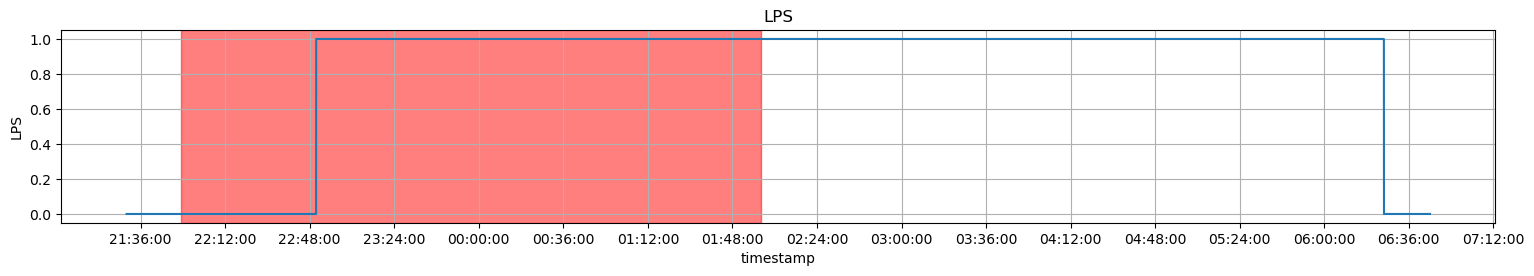

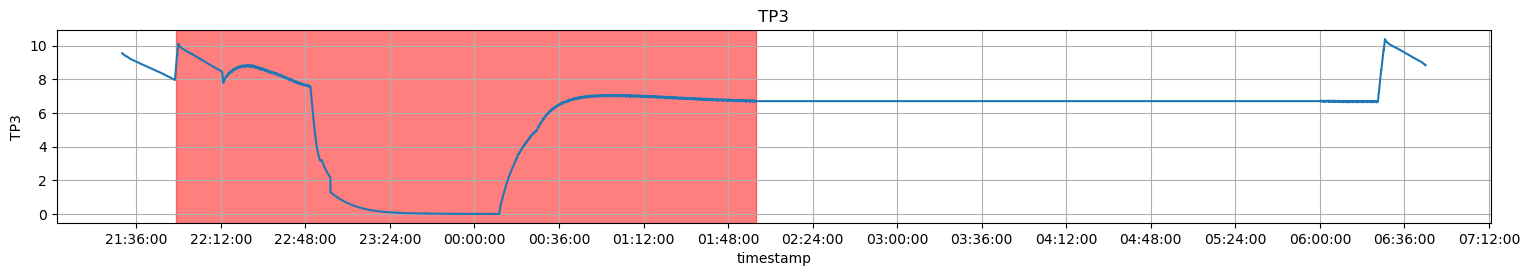

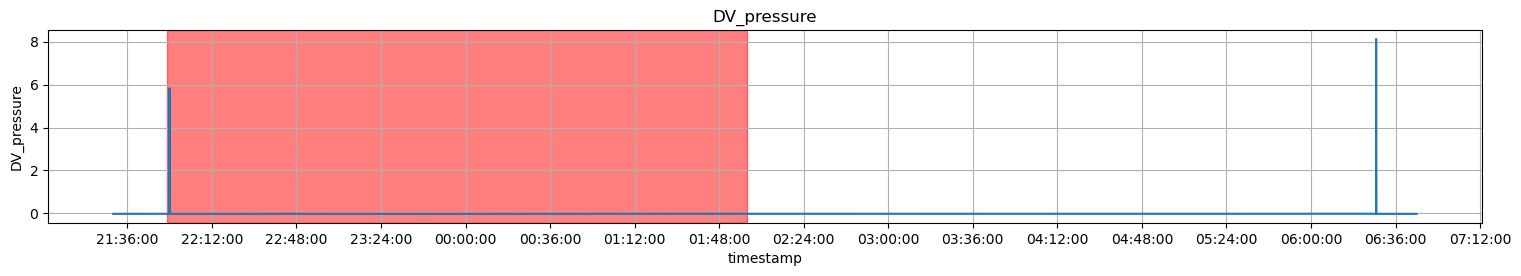

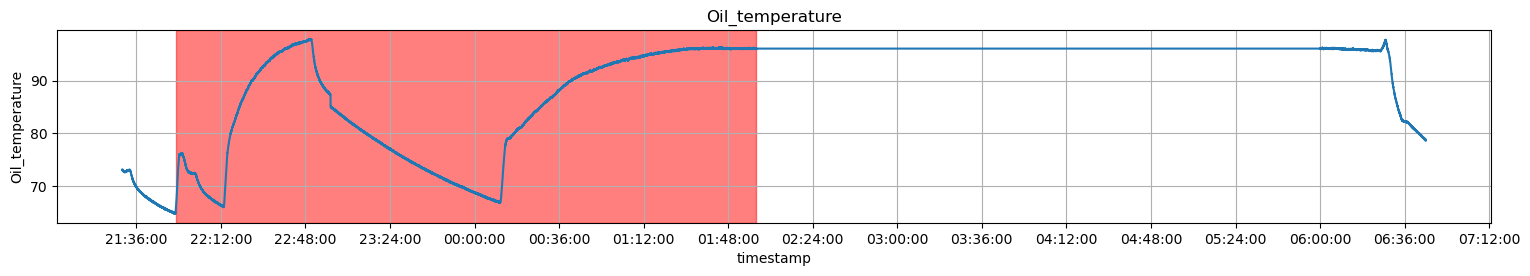

In [11]:
#Fehler 1
start = dt.datetime(2022,2,28,21,30)
end = dt.datetime(2022,3,1,6,45)
# err_1_start = dt.datetime(2022,2,28,22,12)
# err_1_end = dt.datetime(2022,3,1,6,27)

plot_df_matplotlib(df, start, end, 'LPS', err_1_start, err_1_end)
plot_df_matplotlib(df, start, end, 'TP3', err_1_start, err_1_end)
plot_df_matplotlib(df, start, end, 'DV_pressure', err_1_start, err_1_end)
plot_df_matplotlib(df, start, end, 'Oil_temperature', err_1_start, err_1_end)

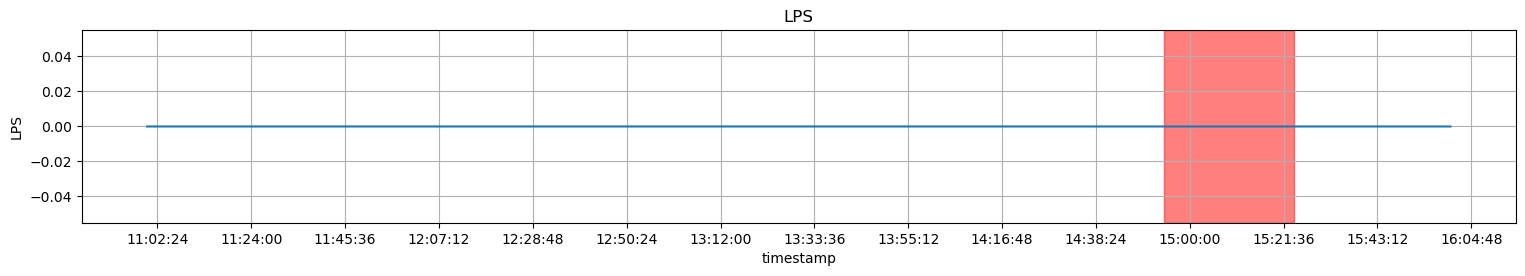

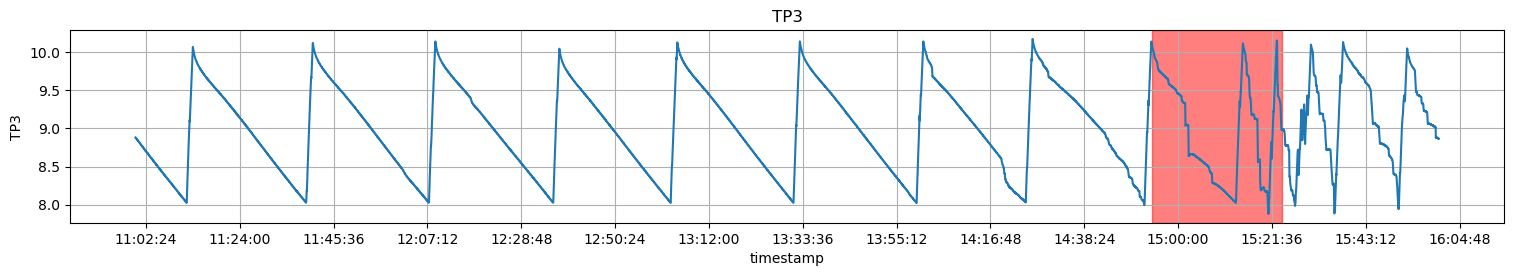

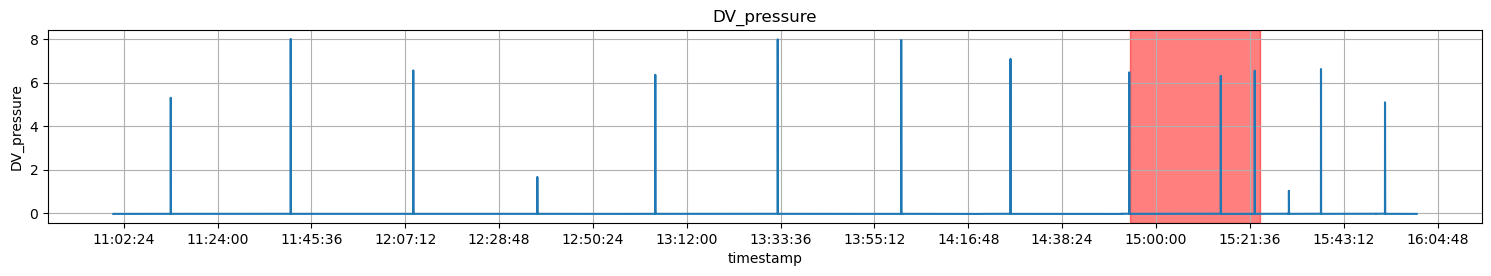

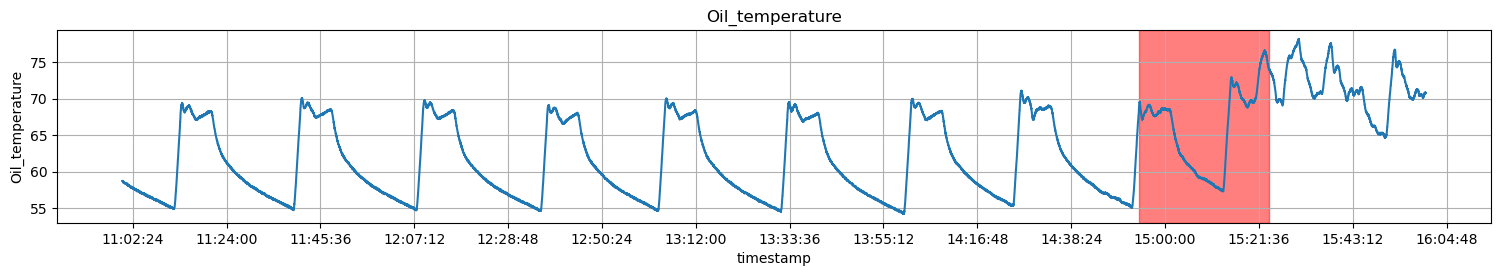

In [12]:
#Fehler 2
start = dt.datetime(2022,3,23,11,00)
end = dt.datetime(2022,3,23,16,00)
# err_2_start = dt.datetime(2022,3,24,11,15)
# err_2_end = dt.datetime(2022,3,24,15,8)


plot_df_matplotlib(df, start, end, 'LPS', err_2_start, err_2_end)
plot_df_matplotlib(df, start, end, 'TP3', err_2_start, err_2_end)
plot_df_matplotlib(df, start, end, 'DV_pressure', err_2_start, err_2_end)
plot_df_matplotlib(df, start, end, 'Oil_temperature', err_2_start, err_2_end)

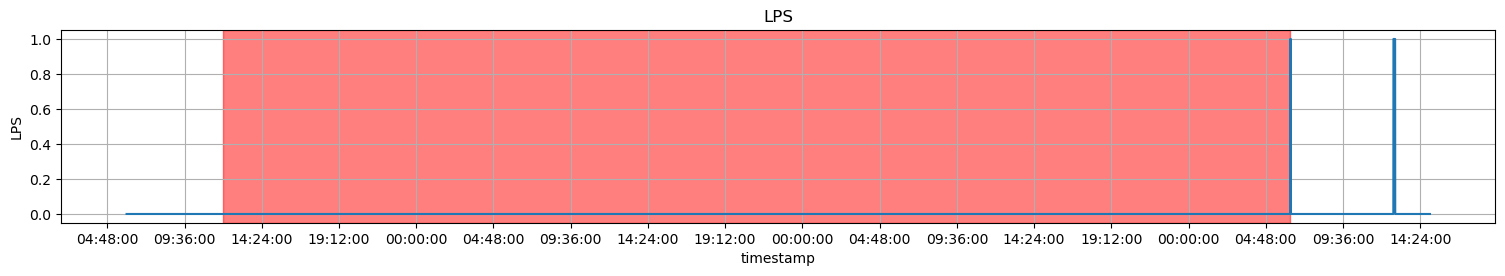

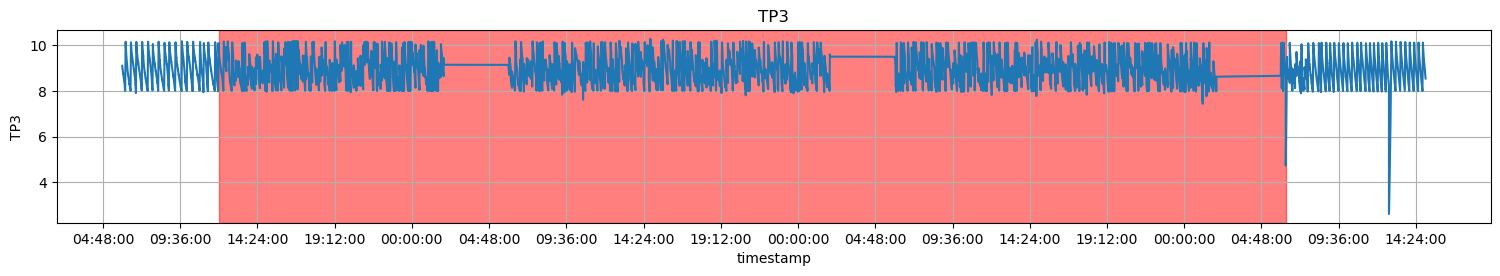

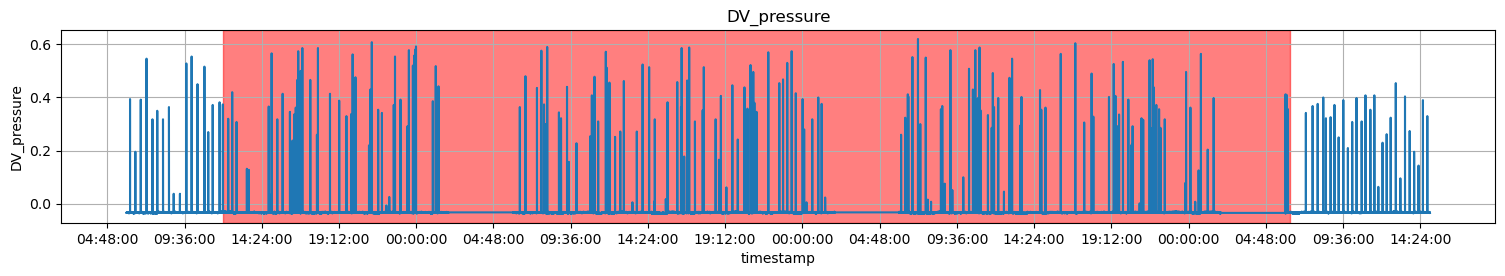

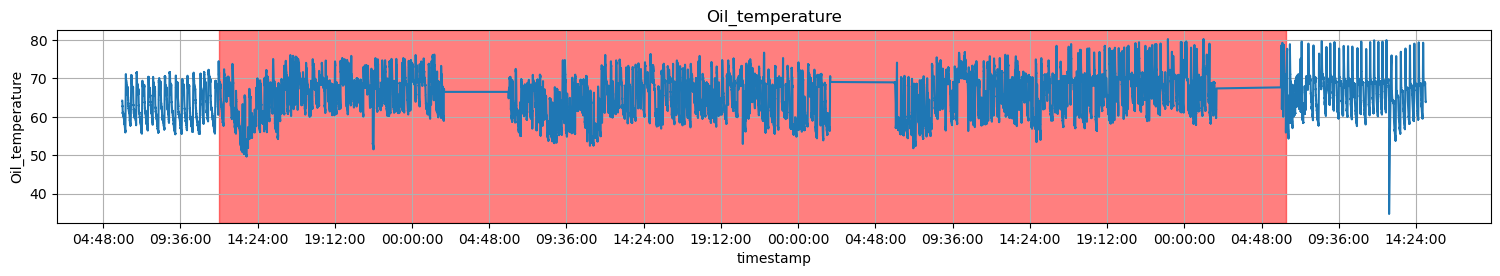

In [13]:
#Fehler 3
start = dt.datetime(2022,5,30,4,00)
end = dt.datetime(2022,6,2,15,00)
# err_3_start = dt.datetime(2022,5,30,12,17)
# err_3_end = dt.datetime(2022,6,2,7,40)

plot_df_matplotlib(df, start, end, 'LPS', err_3_start, err_3_end)
plot_df_matplotlib(df, start, end, 'TP3', err_3_start, err_3_end)
plot_df_matplotlib(df, start, end, 'DV_pressure', err_3_start, err_3_end)
plot_df_matplotlib(df, start, end, 'Oil_temperature', err_3_start, err_3_end)


### Zeiterfassung der Störungsfälle (für eigene Labels)
**Fall 1:**
- 28.2-1.03: 22:12:00 - 6:27:00

**Fall 2:**
- 24.03: 11:15:00 - 15:08:00

**Fall 3:**
- 30.05-02.06: 04:00:00 - 07:40:00 



In [14]:
#Add another column to the dataframe that is called Label is 1 on all rows where the timestamp is between err_1_start and err_1_end or err_2_start and err_2_end or err_3_start and err_3_end and 0 otherwise
df['Label'] = np.where(
    ((df['timestamp'] >= err_1_start) & (df['timestamp'] <= err_1_end)) |
    ((df['timestamp'] >= err_2_start) & (df['timestamp'] <= err_2_end)) | 
    ((df['timestamp'] >= err_3_start) & (df['timestamp'] <= err_3_end)), 1, 0)
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,Label
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0


In [15]:
# a function that plots every column in a dataframe in a single plot using matplotlib in subplots
def plot_df_all_columns(df, start, end):
    # Create a new dataframe with the data between start and end timestamps
    mask = (df['timestamp'] > start) & (df['timestamp'] <= end)
    df_plot = df.loc[mask]
    # Create a matplotlib figure
    fig, axs = plt.subplots(df_plot.columns.size, 1, figsize=(20, 40))

    i = 0
    for col in df_plot.columns:
        axs[i].plot(df_plot['timestamp'], df_plot[col])
        axs[i].set(xlabel='timestamp', ylabel=col, title=col)
        #display 20 x-axis labels
        axs[i].xaxis.set_major_locator(plt.MaxNLocator(20))
        axs[i].grid()
        formatter = DateFormatter('%H:%M:%S')
        fig1 = plt.gcf()
        fig1.axes[0].xaxis.set_major_formatter(formatter)
        i = i + 1

    fig.tight_layout()
    plt.show()

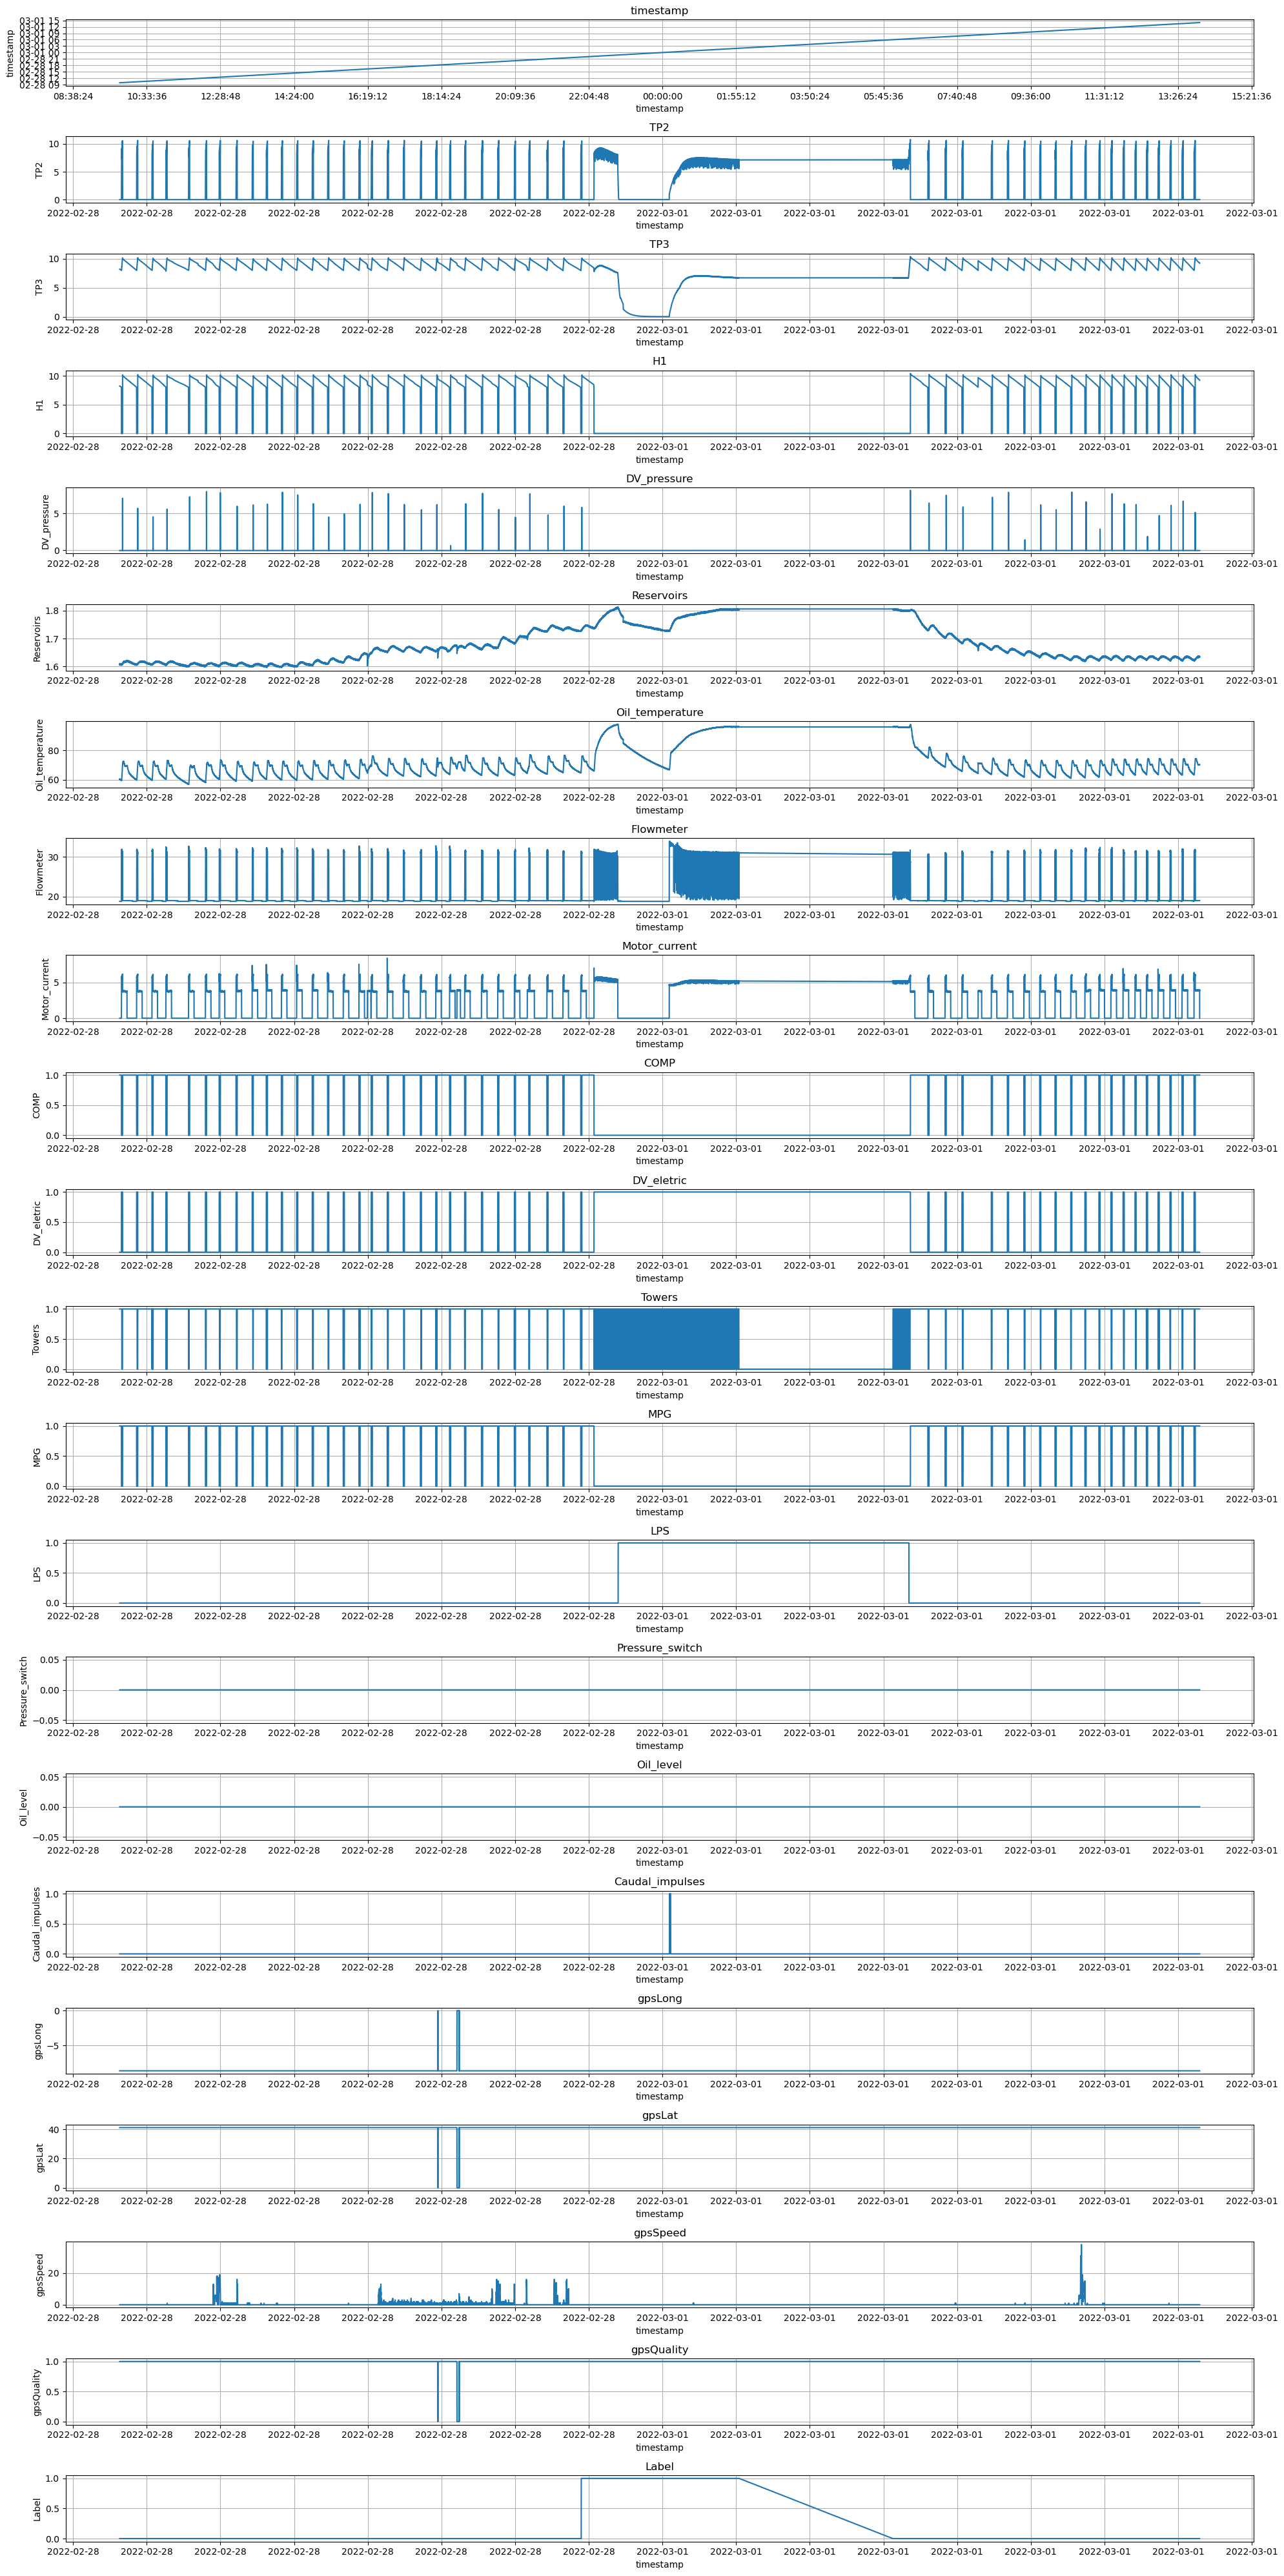

In [16]:
s = err_1_start - dt.timedelta(hours=3*4, seconds=100)
e = err_1_end   + dt.timedelta(hours=3*4)
plot_df_all_columns(df, s, e)

In [17]:
#Klassifizierung mit Decision Tree
class DecisionTreeBinaryClassifier:
    def __init__(self, test_size=0.3, random_state=42, max_depth=7, min_samples_leaf=10, columns=[]):
        #set parameters
        self.test_size = test_size
        self.random_state = random_state
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.columns = columns
        self.model = DecisionTreeClassifier(max_depth = self.max_depth, min_samples_leaf = self.min_samples_leaf)

    def fit(self, df, label):
        #split data into train and test
        train_n, test_n = train_test_split(df, test_size=self.test_size, random_state=self.random_state)
        #split train and test into X and y
        y_train = train_n[label]
        y_test  = test_n[label]
        #drop label from X
        X_train = train_n.drop([label],axis=1)
        X_test = test_n.drop([label],axis=1)
        #keep only columns that are in self.columns
        X_train = X_train[self.columns]
        X_test = X_test[self.columns]
        #save X and y for later use
        self.X_test, self.X_train = X_test, X_train
        self.y_test, self.y_train = y_test, y_train
        #fit model
        self.model.fit(X_train, y_train)

    def score(self):
        #return accuracy score
        return self.model.score(self.X_test, self.y_test)

    def predict(self):
        #return prediction
        return self.model.predict(self.X_test)


    def confusionMatrix(self):
        y_pred = self.predict()
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.model.classes_)
        return disp.plot()

    def corellationMatrix(self):
        corr = self.X_train.corr()
        return sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns)
    
    def decisionTreeGraph(self):
        dot_data = tree.export_graphviz(self.model, out_file=None) 
        dot_data = tree.export_graphviz(self.model, out_file=None, 
                            feature_names=self.X_train.columns,  
                            class_names=['0','1'],  
                            filled=True, rounded=True,  
                            special_characters=True) 
        graph = graphviz.Source(dot_data)
        return graph

 


In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math



In [19]:
analog_sensors = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_Temperature', 'Flowmeter', 'Motor_Current']
digitial_sensors = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [33]:




class MetroBinaryClassifier:



    def __init__(self, use_shortened: False, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=7, min_samples_leaf=10, excluded_columns=[]):
        self.n_components = n_components
        self.windowSize = window_size
        self.test_size = test_size
        self.random_state = random_state
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.excluded_columns = excluded_columns
        self.use_shortened = use_shortened

        self.scaler = None
        self.pca = None

        self.feature_columns = None

        #Dataset:
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

        #classifiers
        self.decision_tree = None
        self.random_forest = None
        self.linear_regression = None
        self.linear_SVM = None
        self.naive_bayes = None
        self.linear_discriminant_analysis = None

        #scores

        #regressions
        self.polyreg_scaled = None

    def sliding_window(self, data: DataFrame, window_size = 60, excluded_columns = ['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality']):
        """
        Creates a sliding window of size window_size for each column in data.
        Performs the following operations on each column:
        - mean
        - std
        - min
        - max

        Parameters
        ----------
        data : DataFrame
            The DataFrame that should be transformed.

        window_size : int, optional
            The size of the sliding window. The default is 60.

        excluded_columns : list, optional
            A list of columns that should be excluded from the sliding window. The default is ['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'].

        Returns
        -------
        df_rolling : DataFrame
            The transformed DataFrame.
        """
        columns = data.columns
        columns  = [x for x in columns if x not in excluded_columns]
        operations = ['mean', 'std', 'min', 'max']

        #generate a dict, where the keys are the column names and the values are the operations that should be performed on the column
        operations_dict = {}
        for column in columns:
            operations_dict[column] = operations
            #keep the labels
            #operations_dict['Label'] = ['max']

        df_rolling = data.rolling(window_size).agg(operations_dict)

        #drop all columns that have NaN values
        df_rolling = df_rolling.dropna()

        #flatten df_rolling
        df_rolling.columns = ['_'.join(col) for col in df_rolling.columns]

        #keep original LabelValues
        df_rolling['Label'] = data['Label']

        #rename Label_min to Label
        #df_rolling = df_rolling.rename(columns={'Label_max': 'Label'})
        return df_rolling
    
    def scale(self, train, test):
        """
        Scale the data using StandardScaler
        Fits the scaler on the training data and transforms the training and test data.

        Parameters
        ----------
        train : DataFrame
            The training data.

        test : DataFrame
            The test data.

        Returns
        -------
        train_rescaled : DataFrame
            The rescaled training data.
        """
        self.scaler = StandardScaler()
        train_rescaled = self.scaler.fit_transform(train)
        test_rescaled = self.scaler.transform(test)

        return train_rescaled, test_rescaled
    
    def performPca(self, train, test):
        """
        Perform PCA on the data.
        Fits the PCA on the training data and transforms the training and test data.
        This is done to reduce the dimensionality of the data.
        This will slightly reduce the accuracy of the model, but will increase the speed of the model.
        Uses the n_components parameter given by in the constructor of the class to determine the number of components.
        (if a float is given, the number of components is determined by the explained variance)

        Parameters
        ----------
        train : DataFrame
            The training data.

        test : DataFrame
            The test data.

        Returns
        -------
        train_pca : DataFrame
            The PCA transformed training data.

        test_pca : DataFrame
            The PCA transformed test data.
        """
        self.pca = PCA(n_components=self.n_components,random_state=self.random_state)
        train_pca = self.pca.fit_transform(train)
        test_pca = self.pca.transform(test)

        return train_pca, test_pca

    
    def prepareData(self, dataFrame, do_scale=True, do_pca=True):
        """
        Prepare the data for the model.
        This includes(if desired):
        - sliding window
        - scaling
        - PCA

        Parameters
        ----------
        dataFrame : DataFrame
            The DataFrame that should be prepared.

        do_scale : bool, optional
            Whether the data should be scaled. The default is True.

        do_pca : bool, optional
            Whether PCA should be performed on the data. The default is True.

        Returns
        -------
        X_train : DataFrame
            The training data.

        X_test : DataFrame
            The test data.

        y_train : DataFrame
            The training labels.

        y_test : DataFrame
            The test labels.
        """

        data = dataFrame

        if(self.use_shortened):
            data = self.shorten(dataFrame)

        data_rolling = self.sliding_window(data, window_size=self.windowSize, excluded_columns=self.excluded_columns)

        y = data_rolling['Label']
        #y = data_rolling.loc[:, 'Label']

        data_rolling.drop(['Label'], axis=1, inplace=True)

        X = data_rolling

        self.feature_columns = X.columns

        print(self.feature_columns)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state, stratify=y)

        
        if(do_scale):
            X_train, X_test = self.scale(X_train, X_test)

        if(do_pca):
            X_train, X_test = self.performPca(X_train, X_test)

        self.X_train, self.X_test = X_train, X_test
        self.y_train, self.y_test = y_train, y_test

        return X_train, X_test, y_train, y_test
    
    def evalModels(self):
        """
        Evaluate the models.
        Prints a Plotly interactive Bar chart for each fitted model that shows the precision, recall and f1 score for each class(only '1' and '0').
        """

        calssifiers = [self.decision_tree, self.random_forest, self.linear_regression, self.linear_SVM, self.naive_bayes, self.linear_discriminant_analysis]



        results = []
        clfs = []
        # precison = {
        #     '0': [],
        #     '1': []
        # }
        # recall = {
        #     '0': [],
        #     '1': []
        # }
        # f1_score = {
        #     '0': [],
        #     '1': []
        # }

        precison = {}
        recall = {}
        f1_score = {}


        for label in self.y_test.unique():
            precison[str(label)] = []
            recall  [str(label)] = []
            f1_score[str(label)] = []

        print(f1_score)

        for classifier in calssifiers:
            if(classifier is not None):
                y_true, y_pred = self.y_test, classifier.predict(self.X_test)
                evaluation = classification_report(y_true, y_pred, output_dict=True)

                clfs.append(classifier.__class__.__name__)
                    
                for label in self.y_test.unique():
                    precison[str(label)].append(evaluation[str(label)]['precision'])
                    recall  [str(label)].append(evaluation[str(label)]['recall'])
                    f1_score[str(label)].append(evaluation[str(label)]['f1-score'])

        print(precison, recall, f1_score)

        print(results)
        #make a plot with plotly, where on the x axis are  the classifiers, each classifier has bar for classes precison, recall and f1-score

        data = []

        #calssifiers_scores = [self.lossFunction()]
        #i=0

        for label in self.y_test.unique():
            print("label", label)
            data.append(go.Bar(name ='[' + str(label) + '] precision',    x=clfs, y=precison[str(label)] ,text=precison[str(label)] ,textposition='auto',))
            data.append(go.Bar(name ='[' + str(label) + '] recall',       x=clfs, y=recall[str(label)]   ,text=recall[str(label)]   ,textposition='auto',))
            data.append(go.Bar(name ='[' + str(label) + '] f1-score',     x=clfs, y=f1_score[str(label)] ,text=f1_score[str(label)] ,textposition='auto',))
            #data.append(go.Bar(name ='[' + str(label) + '] average score',x=clfs, y=average_score[str(label)] ,text=average_score[str(label)] ,textposition='auto',))
            #data.append(go.Bar(name = "average_accuracy", x=clfs, y=calssifiers_scores[i]))
            #i=i+1

        fig = go.Figure(data=data)
        # Change the bar mode
        fig.update_layout(barmode='group')
        fig.show()


    def lossFunctionDecisionTree2(self):
        """
        Returns the loss function for the decision tree.
        """
        impurities = self.decision_tree.apply(self.X_test)
        classes, counts = np.unique(impurities, return_counts=True)
        class_probabilities = counts / counts.sum()

        # Calculate the Gini impurity
        gini_impurity = 1 - np.sum(np.square(class_probabilities))

        # Calculate the entropy
        entropy_impurity = - np.sum(class_probabilities * np.log2(class_probabilities))

        return gini_impurity, entropy_impurity


    def lossFunctionLinearDiscriminantAnalysis(self):
        # Predict using the model
        y_pred = self.linear_discriminant_analysis.predict(self.X_test)
        loss = 1 - accuracy_score(self.y_test, y_pred)
        return loss

    def lossFunctionNaiveBayes(self):
        # Predict using the model
        y_pred = self.naive_bayes.predict(self.X_test)
        loss = 1 - accuracy_score(self.y_test, y_pred)
        return loss

    def lossFunctionRandomForest(self):
        # Predict using the model
        y_pred = self.random_forest.predict(self.X_test)
        loss = 1 - accuracy_score(self.y_test, y_pred)
        return loss
    
    def lossFunctionDecisionTree(self):
        # Predict using the model
        y_pred = self.decision_tree.predict(self.X_test)
        loss = accuracy_score(self.y_test, y_pred)
        return loss
    
    
    def scoreDecisionTree(self):
        # Predict using the model
        accuracy = self.decision_tree.score(self.X_test, self.y_test)
        print("Max_Depth:" ,self.max_depth)
        print("Min_Sample_Leaf:" ,self.min_samples_leaf)
        return accuracy



    def ConfusionMatricesis(self):
        """
        Shows a plotly interactive confusion matrix for each fitted model.
        """

        calssifiers = [self.decision_tree, self.random_forest, self.linear_regression, self.linear_SVM, self.naive_bayes, self.linear_discriminant_analysis]

        #list of all classifiers that are not None
        clfs = [clf for clf in calssifiers if clf is not None]
        y_true = self.y_test
        cmats = []
        
        #get the confusion matrix for each classifier
        for clf in clfs:
            y_pred = clf.predict(self.X_test)
            cmats.append(confusion_matrix(y_true, y_pred)) 
            
        #Titles for each matrix is the class name of the classifier
        titles = [clf.__class__.__name__ for clf in clfs]

        #Calculate the optimal grid size for the plot
        n = len(clfs)
        rows = int(math.sqrt(n))
        cols = int(math.ceil(n / rows))
        
        #plotgird for the confusion matrices
        fig = make_subplots(rows=rows, cols=cols,
                        subplot_titles=(titles))

        
        #add the confusion matrices to the plot
        r=1
        c=1
        for i in range(len(clfs)):
            heatmap = go.Heatmap(
                z=cmats[i],
                text=cmats[i],
                texttemplate="%{text}",
                textfont={"size": 10},)            

            fig.add_trace(heatmap,row=r,col=c)
            
            #fill the grid from left to right, top to bottom
            if(c<cols):
                c=c+1
            else:
                r=r+1
                c=1
        fig.show()


    def fitDecisionTree(self):
        self.decision_tree = DecisionTreeClassifier()
        self.decision_tree.fit(self.X_train, self.y_train)
    
    def decisionTreeConfusionMatrix(self):
        y_pred = self.decision_tree.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.decision_tree.classes_)
        return disp.plot()
    
    def decisionTreeGraph(self):
        dot_data = tree.export_graphviz(self.decision_tree, out_file=None) 
        dot_data = tree.export_graphviz(self.decision_tree, out_file=None, 
                            feature_names=self.X_train.columns,  
                            class_names=['0','1'],  
                            filled=True, rounded=True,  
                            special_characters=True) 

        graph = graphviz.Source(dot_data)
        return graph
    
    def fitRandomForest(self):
        self.random_forest = RandomForestClassifier(n_estimators=10)
        self.random_forest.fit(self.X_train, self.y_train)
    
    def randomForestConfusionMatrix(self):
        y_pred = self.random_forest.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.random_forest.classes_)
        return disp.plot()
    
    def fitLinearRegression(self):
        self.linear_regression = LinearRegression(n_jobs=-1)
        self.linear_regression.fit(self.X_train, self.y_train)
    
    def linearRegressionConfusionMatrix(self):
        y_pred = self.linear_regression.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.linear_regression.classes_)
        return disp.plot()
    
    def fitLinearSVM(self):
        self.linear_SVM = LinearSVC()
        self.linear_SVM.fit(self.X_train, self.y_train)
    
    def fitNaiveBayes(self):
        self.naive_bayes = GaussianNB(var_smoothing=1e-15,)
        self.naive_bayes.fit(self.X_train, self.y_train)
    
    def naiveBayesConfusionMatrix(self):
        y_pred = self.naive_bayes.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.naive_bayes.classes_)
        return disp.plot()
    
    def fitLinearDiscriminantAnalysis(self):
        self.linear_discriminant_analysis = LinearDiscriminantAnalysis()
        self.linear_discriminant_analysis.fit(self.X_train, self.y_train)
    
    def linearDiscriminantAnalysisConfusionMatrix(self):
        y_pred = self.linear_discriminant_analysis.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.linear_discriminant_analysis.classes_)
        return disp.plot()
    
    def linearDiscriminantAnalysisFindSolver(self):
        # define model
        model = LinearDiscriminantAnalysis()
        # define model evaluation method
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        # define grid
        grid = dict()
        grid['solver'] = ['svd', 'lsqr', 'eigen']
        # define search
        search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
        # perform the search
        results = search.fit(self.X_train, self.y_train)
        # summarize
        print('Mean Accuracy: %.3f' % results.best_score_)
        print('Config: %s' % results.best_params_)
    
    def linearSVMConfusionMatrix(self):
        y_pred = self.linear_SVM.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.linear_SVM.classes_)
        return disp.plot()

    def fitPlynomialRegression(self,degree=9):
        from sklearn.pipeline import make_pipeline
        from sklearn.preprocessing import PolynomialFeatures

        scaler = StandardScaler()
        self.polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
        self.polyreg_scaled.fit(self.X_train,self.y_train)

    def polyregScore(self):
        return self.polyreg_scaled.score(self.X_test, self.y_test)    
        

        


    def shorten(self, df):
        """
        Shorten the dataframe around the failures. This should be done to test effects of changes on the models, but shpouldnt be done for the final model.
        """
        dfMin = df.copy()
        #drop vor Fail 1
        dfMin.drop(dfMin[dfMin['timestamp'] < '2022-02-26 23:00:00'].index,inplace=True)

        #drop zwischen Fail1 und Fail2
        dfMin.drop(dfMin[(dfMin['timestamp'] > '2022-03-03 00:00:00') & (dfMin['timestamp'] <= '2022-03-21 00:00:00')].index,inplace=True)

        #drop zwischen Fail 2 und Fail 3
        dfMin.drop(dfMin[(dfMin['timestamp'] > '2022-03-25 00:00:00') & (dfMin['timestamp'] <= '2022-05-28 00:00:00')].index,inplace=True)

        dfMin['Label'].value_counts()
        
        return dfMin


    def hyperparams(self):
        #best hyperparams for decision tree
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.model_selection import GridSearchCV
        from sklearn.metrics import make_scorer, accuracy_score

        # Define the hyperparameter grid
        param_grid = {'max_depth': [range(1, 30), None], 'min_samples_leaf': range(1, 30), 'min_samples_split': range(2, 50)}


        # Define the scorer
        scorer = make_scorer(accuracy_score)

        # Define the GridSearchCV object
        grid_search = GridSearchCV(self.decision_tree, param_grid, scoring=scorer, n_jobs=-1, verbose=1)

        # Fit the GridSearchCV object to the training data
        grid_search.fit(self.X_train, self.y_train)

        # Predict using the best model found by GridSearchCV
        y_pred = grid_search.predict(self.X_test)

        # Calculate the accuracy score
        accuracy = accuracy_score(self.y_test, y_pred)

        print("Accuracy:", accuracy)
        print("Best parameters: ", grid_search.best_params_)


In [34]:
mb = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])
print("Prepareing Data...")
_, _, _, _ = mb.prepareData(df, do_scale=True, do_pca=False)

Prepareing Data...
Index(['TP2_mean', 'TP2_std', 'TP2_min', 'TP2_max', 'TP3_mean', 'TP3_std',
       'TP3_min', 'TP3_max', 'H1_mean', 'H1_std', 'H1_min', 'H1_max',
       'DV_pressure_mean', 'DV_pressure_std', 'DV_pressure_min',
       'DV_pressure_max', 'Reservoirs_mean', 'Reservoirs_std',
       'Reservoirs_min', 'Reservoirs_max', 'Oil_temperature_mean',
       'Oil_temperature_std', 'Oil_temperature_min', 'Oil_temperature_max',
       'Flowmeter_mean', 'Flowmeter_std', 'Flowmeter_min', 'Flowmeter_max',
       'Motor_current_mean', 'Motor_current_std', 'Motor_current_min',
       'Motor_current_max', 'COMP_mean', 'COMP_std', 'COMP_min', 'COMP_max',
       'DV_eletric_mean', 'DV_eletric_std', 'DV_eletric_min', 'DV_eletric_max',
       'Towers_mean', 'Towers_std', 'Towers_min', 'Towers_max', 'MPG_mean',
       'MPG_std', 'MPG_min', 'MPG_max', 'LPS_mean', 'LPS_std', 'LPS_min',
       'LPS_max', 'Pressure_switch_mean', 'Pressure_switch_std',
       'Pressure_switch_min', 'Pressure_switch

In [35]:
print("Fitting Decision Tree...")
mb.fitDecisionTree()
print("Fitting Random Forest...")
mb.fitRandomForest()
print("Fitting Linear Regression...")
mb.fitLinearDiscriminantAnalysis()
print("Fitting Naive Bayes...")
mb.fitNaiveBayes()

Fitting Decision Tree...
Fitting Random Forest...
Fitting Linear Regression...
Fitting Naive Bayes...


In [36]:
mb.hyperparams()

Fitting 5 folds for each of 2784 candidates, totalling 13920 fits


KeyboardInterrupt: 

In [ ]:
mb.lossFunctionDecisionTree()	

In [ ]:
mb.scoreDecisionTree()

In [ ]:
mb.lossFunctionLinearDiscriminantAnalysis()

In [ ]:
mb.lossFunctionNaiveBayes()

In [ ]:
mb.lossFunctionRandomForest()

In [ ]:
#Decision Tree Gini & Entropy (die Verluste, die durch die Fehler entstehen)
mb.lossFunctionDecisionTree2()

#(0.8307373392927819, 5.979577427075931)
#Der Gini-Wert von 0.83 und die Entropie von 5.97 sind sehr hoch, was bedeutet, dass einige Datenpunkte nicht korrekt klassifiziert wurden. 
#Es kann sein, dass dies auf eine Overfitting des Entscheidungsbaums zurückzuführen ist, da der Datensatz größer als die Labels ist.
#In solchen Fällen kann es hilfreich sein, die Anzahl der Entscheidungsknoten im Baum zu beschränken oder andere Methoden zur Vermeidung von 
#Overfitting anzuwenden. Perfekt wäre wenn die Werte kleiner wären als 0.5 und 0.0, da dies bedeutet, dass alle Datenpunkte korrekt klassifiziert 
#wurden.

In [ ]:
mb.evalModels()

In [ ]:
mb.ConfusionMatricesis()

In [ ]:
#all but the excluded columns
excluded = ['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality']
columns = [c for c in df.columns if c not in excluded]

Welche Features sind besonders Aussagekräftig?

In [ ]:
importances = mb.random_forest.feature_importances_
forest = mb.random_forest
forest_importances = pd.Series(importances, index=mb.feature_columns)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.set_figheight(15)
fig.set_figwidth(30)
fig.tight_layout()
fig.show()

Besonder Aussagekräftig sind Vorallem die Analogen Sensoren
Vergleich training nur mit Analog Sensoren und mit allen Sensoren

In [ ]:
excluded = ['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality']
excluded.extend(digitial_sensors)
#remove duplicates
excluded = list(dict.fromkeys(excluded))

In [ ]:
metClf = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=excluded)
print("Prepareing Data...")
_, _, _, _ = metClf.prepareData(df, do_scale=True, do_pca=False)

#fit classifiers
print("Fitting Decision Tree...")
metClf.fitDecisionTree()
print("Fitting Random Forest...")
metClf.fitRandomForest()
print("Fitting Linear Regression...")
metClf.fitLinearDiscriminantAnalysis()
print("Fitting Naive Bayes...")
metClf.fitNaiveBayes()

metClf.evalModels()

Ergebniss: Ohne Digitale Sensoren Modell minimal Besser

In [ ]:
importances = metClf.random_forest.feature_importances_
forest = metClf.random_forest
forest_importances = pd.Series(importances, index=metClf.feature_columns)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.set_figheight(15)
fig.set_figwidth(30)
fig.tight_layout()
fig.show()

In [ ]:
#print the 10 most importent features in descending order
forest_importances.sort_values(ascending=False).head(10)

In [ ]:
#TODO ERKLÄRUNGEN HINZUFÜGEN

Werden nur Analoge Sensoren Verwendet, sind die Wichtigsten Sensoren:
- **DV_pressure_mean**      [0.087352]
- **DV_pressure_min**       [0.072631]
- **Reservoirs_max**        [0.060411]
- **Flowmeter_min**         [0.055333]
- **Reservoirs_min**        [0.051933]
- **TP3_std**               [0.050655]
- **H1_std**                [0.049547]
- **Oil_temperature_max**   [0.048480]
- **Oil_temperature_mean**  [0.046990]
- **Reservoirs_mean**       [0.046393]


In [ ]:
# #find best parameters for max_depth and min_samples_leaf on a range from 3 to 30 for best accuracy

# best_accuracy = 0
# best_params = (0, 0)

# #column of the label
# label = 'Label'
# #only keep columns: TP3, LPS, DV_pressure, Oil_temperature
# columns = ['TP3', 'LPS', 'DV_pressure', 'Oil_temperature']

# for max_depth in range(3,15):
#     for min_samples_leaf in range(3,12):
#         clf = DecisionTreeBinaryClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, columns=columns)
#         clf.fit(df=df, label=label)
#         accuracy = clf.score()
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_params = (max_depth, min_samples_leaf)

# print("Best max_depth:", best_params[0])
# print("Best min_samples_leaf:", best_params[1])
# print("Best accuracy:", best_accuracy)

### Aufgabe 2 (Vorhersage des Eintretens von Störungen)
Erstellen Sie nun Klassifikationsmodelle, um anhand der gegebenen Sensormessdaten vorherzusagen, ob innerhalb eines bestimmten Zeitraums (z.B. 1 Stunde, 2 Stunden etc.) eine Storung der APU auftreten wird. Laut Betreiber ware es wünschenswert, mindestens zwei Stunden im Voraus eine Storung vorhersagen zu können, um rechtzeitig Maßnahmen einzuleiten, vgl. [1]. Testen Sie verschiedene Prognosezeitraume und stellen Sie die resultierenden Modelle gegen über.

In [ ]:
# IDEE:
# Datensatz shiften um ein gewisses Window, labels aber gleich behalten

In [ ]:
# A single step is 1s 
shiff_steps = 60*60*48 # 1a011
pd.options.display.max_columns = None

# Create a new dataframe, that has a extra column foreach column with the vlaue of the original column shifted by "shiff_steps" steps
df_shifted = pd.DataFrame()
for column in df.columns:
    if column != 'Label' or column != 'timestamp':
        df_shifted[column] = df[column].shift(shiff_steps)
        #df_shifted[column+"(t)"] = df[column]

    if(column == 'Label' or column == 'timestamp'):
        df_shifted[column] = df[column]

#drop nan rows
df_shifted.dropna(inplace=True)

df_shifted

In [ ]:
pd.set_option('display.max_rows', 1000)

#show the shifted_data around the second failure with a buffer of 3 hours before and after
df_shifted[(df_shifted['timestamp'] > '2022-03-23 15:00:00') & (df_shifted['timestamp'] <= '2022-03-25 17:00:00')]

In [ ]:
df_shifted

In [ ]:
futureBinaryClassifier = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])
futureBinaryClassifier.prepareData(df_shifted, do_scale=False, do_pca=False)

In [ ]:
futureBinaryClassifier.fitRandomForest()

In [ ]:
print(futureBinaryClassifier.randomForestScore())
futureBinaryClassifier.randomForestConfusionMatrix()


In [ ]:
importances = futureBinaryClassifier.random_forest.feature_importances_
forest = futureBinaryClassifier.random_forest
forest_importances = pd.Series(importances, index=forest.feature_names_in_)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
m = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])

#X_train, X_test, y_train, y_test = m.prepareData(df_shifted)

### Aufgabe 3 (Vorhersage der Dauer von Störungen)
Entwickeln Sie Prognosemodelle zur Vorhersage der Storungsdauer und beurteilen Sie auf geeignete Weise deren Gute sowie deren Eignung für den Einsatz in der Praxis. Sofern diese aus Ihrer Sicht nicht ausreichend ist, skizzieren Sie Maßnahmen, durch die die Gute verbessert werden konnte.

In [ ]:
#Aus Tabelle
err_1_start = dt.datetime(2022,2,28,21,53)
err_1_end = dt.datetime(2022,3,1,2,00)
err_2_start = dt.datetime(2022,3,23,14,54)
err_2_end = dt.datetime(2022,3,23,15,24)
err_3_start = dt.datetime(2022,5,30,12,00)
err_3_end = dt.datetime(2022,6,2,6,18)

In [ ]:
#Methode 1: Labels sind verbleibende Störungszeit

df_remaining = pd.read_csv('dataset_train.csv')
df_remaining['timestamp'] = pd.to_datetime(df_remaining['timestamp'])

#Set Labels. The label is the remaining time until the end of the current failure. if there is no failure, the label is 0

def LabelGeneration(row):
    timestamp = row['timestamp']

    #Fail 1
    if timestamp > err_1_start and timestamp <= err_1_end:
        return (err_1_end - timestamp).total_seconds()

    #Fail 2
    if timestamp > err_2_start and timestamp <= err_2_end:
        return (err_2_end - timestamp).total_seconds()

    #Fail 3
    if timestamp > err_3_start and timestamp <= err_3_end:
        return (err_3_end - timestamp).total_seconds()

    #No Fail
    return 0
    
df_remaining['Label'] = df_remaining.apply(lambda row: LabelGeneration(row), axis=1)

In [ ]:
df_remaining[(df_remaining['timestamp'] > '2022-03-23 15:00:00') & (df_remaining['timestamp'] <= '2022-03-23 15:24:00')]


In [ ]:
#plot the labels
df_remaining['Label'].plot()

In [ ]:
c = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])
c.prepareData(df_remaining, do_scale=False, do_pca=True)
# c.fitRandomForest()
# print(c.randomForestScore())
# c.randomForestConfusionMatrix()

In [ ]:
c.fitLinearRegression()

In [ ]:
c.linear_regression.predict(c.X_test)
actual = c.y_test.copy()
#reset the index of the actual values
actual.reset_index(drop=True, inplace=True)
results = pd.DataFrame({'Actual': actual, 'Predicted': c.linear_regression.predict(c.X_test)})
results

In [ ]:
#plt the acuatl values and the same values in the same diagramm
plt.plot(actual, label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.legend()
#set the dimension of the plot so taht the x axis is not to small
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

* degree:  1  score:  0.016736459131068804
* degree:  2  score:  0.10737802942146979
* degree:  3  score:  0.15132775411259902
* degree:  4  score:  0.2028557891968763
* degree:  5  score:  0.2363742270730982
* degree:  6  score:  0.2534498976049867
* degree:  7  score:  0.2744239750665127
* degree:  8  score:  0.28447377870745905
* degree:  9  score:  0.2391308987311287
* degree:  10  score:  -3.9171914332267095
* degree:  11  score:  -6.665693831506913
* degree:  12  score:  -50.20041370882595
* degree:  13  score:  -292.0148401877538

In [ ]:
# #find best accuracy
# for i in range(1, 20):
#     c.fitPlynomialRegression(degree=i)
#     print('degree: ', i, ' score: ', c.polyregScore())

In [ ]:
c.fitPlynomialRegression(degree=8)

In [ ]:
c.polyregScore()
y_pred = c.polyreg_scaled.predict(c.X_test)

actual = c.y_test.copy()
#reset the index of the actual values
actual.reset_index(drop=True, inplace=True)
results = pd.DataFrame({'Actual': actual, 'Predicted': y_pred})

plt.plot(actual, label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.legend()
#set the dimension of the plot so taht the x axis is not to small
plt.rcParams["figure.figsize"] = (40,20)
plt.show()

In [ ]:
c.polyregScore()

In [ ]:
#order the results df by the actual values descending
results.sort_values(by=['Actual'], ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
plt.plot(actual, label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.legend()
#set the dimension of the plot so taht the x axis is not to small
plt.rcParams["figure.figsize"] = (40,20)
plt.show()

In [ ]:
results.plot()

---
#### 2. Ansatz: Verbleibende Zeit in Klassen aufteilen.
Anstelle dass die Labels die verbleibende Zeit bis zum Ende der Störung sind, werden die Labels die verbleibende Zeit in Klassen aufgeteilt.
Die Klassen sind x verbleibende Minuten. So kann ein Klassifikator auf das Problem angewand werden, alledings kann bei diesem Ansatz selbst ein perfekter klassifikator die zeit nur so genau vorhersagen wie die Klassen aufgeteilt sind.

In [ ]:
#read the test data again 
df_remaining = pd.read_csv('dataset_train.csv')

#set the timestamp column to datetime
df_remaining['timestamp'] = pd.to_datetime(df_remaining['timestamp'])

#set the labels to 0
df_remaining['Label'] = 0

x_minutes = 2

#now we set the labels not corresponding to the remaining seconds, but to the remaining x minutes (rounded up, so the last minute does not classify as 0)
def LabelGeneration(row):
    timestamp = row['timestamp']

    #Fail 1
    if timestamp > err_1_start and timestamp <= err_1_end:
        return math.ceil((err_1_end - timestamp).total_seconds() / (60*x_minutes))

    #Fail 2
    if timestamp > err_2_start and timestamp <= err_2_end:
        return math.ceil((err_2_end - timestamp).total_seconds() / (60*x_minutes))

    #Fail 3
    if timestamp > err_3_start and timestamp <= err_3_end:
        return math.ceil((err_3_end - timestamp).total_seconds() / (60*x_minutes))

    #No Fail
    return 0

df_remaining['Label'] = df_remaining.apply(lambda row: LabelGeneration(row), axis=1)

In [ ]:
df_remaining[(df_remaining['timestamp'] > '2022-03-23 15:00:00') & (df_remaining['timestamp'] <= '2022-03-23 15:24:00')]

Jetzt können wieder die gleichen Klassifikatoren wie oben angewandt werden.

In [ ]:
remaining_classifier = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])

_,_,_,_ = remaining_classifier.prepareData(df_remaining, do_scale=True, do_pca=False)

In [ ]:
#print("Fitting Decision Tree..")
#remaining_classifier.fitDecisionTree()
print("Fitting Random Forest..")
remaining_classifier.fitRandomForest()
# print("Fitting Naive Bayes..")
# remaining_classifier.fitNaiveBayes()
# print("Fitting Linear Regression..")
# remaining_classifier.fitLinearDiscriminantAnalysis()

In [ ]:
#remaining_classifier.evalModels()

In [ ]:
remaining_classifier.random_forest.score(remaining_classifier.X_test, remaining_classifier.y_test)

In [ ]:
remaining_classifier.randomForestConfusionMatrix()

In [ ]:
#remaining_classifier.ConfusionMatricesis()

### Aufgabe 4 (Vorhersage der gestorten Komponente) 
Untersuchen Sie, ob sich der Datensatz auch dazu eignet, die von einer Storung betroffenen Komponente anhand der Sensordaten zu identifizieren. Erstellen und evaluieren Sie dazu entsprechende Modelle.

In [ ]:
#read data from csv, because we need to reassing the labels
df_type = pd.read_csv('dataset_train.csv')
df_type['timestamp'] = pd.to_datetime(df_type['timestamp'])


In [ ]:
#for the 3 error timespans set a label colum that from 1 to 3 and the rest to 0
#Aus Tabelle
err_1_start = dt.datetime(2022,2,28,21,53)
err_1_end = dt.datetime(2022,3,1,2,00)
err_2_start = dt.datetime(2022,3,23,14,54)
err_2_end = dt.datetime(2022,3,23,15,24)
err_3_start = dt.datetime(2022,5,30,12,00)
err_3_end = dt.datetime(2022,6,2,6,18)

In [ ]:


#add a label column to the dataframe that is only zeros
df_type['Label'] = 0

#if the data is between err_1_start and err_1_end set the label to 1
df_type.loc[(df_type['timestamp'] >= err_1_start) & (df_type['timestamp'] <= err_1_end), 'Label'] = 1

#if the data is between err_2_start and err_2_end set the label to 2
df_type.loc[(df_type['timestamp'] >= err_2_start) & (df_type['timestamp'] <= err_2_end), 'Label'] = 2

#if the data is between err_3_start and err_3_end set the label to 3
df_type.loc[(df_type['timestamp'] >= err_3_start) & (df_type['timestamp'] <= err_3_end), 'Label'] = 3


In [ ]:
clf = MetroBinaryClassifier(use_shortened=False, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])
_,_,_,_ = clf.prepareData(df_type, do_scale=False, do_pca=False)

In [ ]:
clf.fitRandomForest()
clf.fitDecisionTree()
clf.fitNaiveBayes()
clf.fitLinearDiscriminantAnalysis()

In [ ]:
clf.randomForestConfusionMatrix()

In [ ]:
clf.evalModels()

In [ ]:
clf.ConfusionMatricesis()

### Aufgabe 5 (Störungserkennung mit Hilfe von Unsupervised Learning)
Eine Herausforderung bei der Modellbildung fur Predictive Maintenance ist häufig das Fehlen von Informationen zu historischen Storungen, sodass Ansätze des Supervised Learning nicht anwendbar sind. In diesem Fall konnen Methoden des Unsupervised Learning eine Option sein. Wenden Sie auf den Datensatz aus Aufgabe 1 (ohne Labels) ein Clustering-Verfahren an und
uberprüfen Sie anhand der gegebenen Informationen zu den historischen Systemausfällen, ob und wie gut sich durch einen solchen Ansatz Ausnahmezustande (Anomalien bzw. Störungen) von "normalen" Systemzustanden der APU unterscheiden lassen.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('dataset_train.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['Label'] = np.where(
    ((df['timestamp'] >= err_1_start) & (df['timestamp'] <= err_1_end)) |
    ((df['timestamp'] >= err_2_start) & (df['timestamp'] <= err_2_end)) | 
    ((df['timestamp'] >= err_3_start) & (df['timestamp'] <= err_3_end)), 1, 0)

In [ ]:
p = MetroBinaryClassifier(use_shortened=False, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])
df_sliding = p.sliding_window(df, 60)

y_true = df_sliding['Label']
df_sliding.drop(['Label'], axis=1, inplace=True)

df_sliding = StandardScaler().fit_transform(df_sliding) # normalize data

#df_sliding, _ = p.performPca(df_sliding, df_sliding)	



In [ ]:


# number of clusters
k = 2

# create and fit k-means model
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_sliding)

# predict cluster labels for new data
labels = kmeans.predict(df_sliding)
labels

In [ ]:
#unique values of the labels array

np.unique(labels)

Beste Clustergröße herausfinden

In [ ]:
if(False):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df_sliding)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

WCSS
* 1: 2097494814.352996
* 2: 1222016429.5818548
* 3: 697675985.9232541
* 4: 561449869.0233672
* 5: 459598615.93620276
* 6: 370670666.4551599
* 7: 326371468.84605604
* 8: 292667190.21452206
* 9: 262847830.99261418
* 10: 240391251.9439149

Gwählt 6, weil ab da die WCSS nicht mehr so stark sinkt.

In [ ]:
# # Train auf cluster 6

# # create and fit k-means model
# kmeans = KMeans(n_clusters=8)
# kmeans.fit(df_sliding)

# # predict cluster labels for new data
# labels = kmeans.predict(df_sliding)

In [ ]:
#make a dataframe out of df_sliding
df_sliding = pd.DataFrame(df_sliding)
df_sliding

In [ ]:
df_both_labels = df_sliding.copy()
df_both_labels['Label'] = y_true
df_both_labels['Cluster'] = labels

In [ ]:
df_both_labels

In [ ]:
#plot the label and cluster columns in a line chart
df_both_labels.plot.line(y=['Cluster', 'Label'])

In [ ]:
df_both_labels['timestamp'] = pd.to_datetime(df['timestamp'])

#show the part around error 1

df_both_labels.loc[(df_both_labels['timestamp'] >= err_1_start - dt.timedelta(0,600)) & (df_both_labels['timestamp'] <= err_1_end + dt.timedelta(0,16000)), 'Label'].plot.line(y=['Cluster', 'Label'])

In [ ]:
df_both_labels['timestamp'] = pd.to_datetime(df['timestamp'])

around_err_1 = df_both_labels.loc[(df_both_labels['timestamp'] >= err_3_start- dt.timedelta(0,600)) & (df_both_labels['timestamp'] <= err_3_end + dt.timedelta(0,16000))]

In [ ]:
around_err_1

In [ ]:
#plot the labels around err1

around_err_1.plot.line(y=['Cluster', 'Label'])

In [ ]:
df_sliding

In [ ]:
df_sliding_with_both_lables = df_sliding.copy()


---------------------------------------------------------------------------
DBSCAN

In [ ]:
df = pd.read_csv('dataset_train.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['Label'] = np.where(
    ((df['timestamp'] >= err_1_start) & (df['timestamp'] <= err_1_end)) |
    ((df['timestamp'] >= err_2_start) & (df['timestamp'] <= err_2_end)) | 
    ((df['timestamp'] >= err_3_start) & (df['timestamp'] <= err_3_end)), 1, 0)

In [ ]:
p = MetroBinaryClassifier(use_shortened=False, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])
df_sliding = p.sliding_window(df, 60)
y_true = df['Label']
df_sliding.drop(['Label'], axis=1, inplace=True)

pca = PCA(n_components=0.95)
df_sliding = pca.fit_transform(df_sliding)

In [ ]:
df_sliding

In [ ]:
#DAuerT SEHR LANGE!

from sklearn.cluster import DBSCAN

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Fit the model to your data
dbscan.fit(df_sliding)

# Obtain the cluster labels for each data point
labels = dbscan.labels_

---------------------------------------------------------------------------
Ansatz GaussianMix

In [ ]:
df = pd.read_csv('dataset_train.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['Label'] = np.where(
    ((df['timestamp'] >= err_1_start) & (df['timestamp'] <= err_1_end)) |
    ((df['timestamp'] >= err_2_start) & (df['timestamp'] <= err_2_end)) | 
    ((df['timestamp'] >= err_3_start) & (df['timestamp'] <= err_3_end)), 1, 0)

In [ ]:
df_sliding = p.sliding_window(df, 60)
y_true = df_sliding['Label']

#scale data

df_sliding.drop(['Label'], axis=1, inplace=True)
df_sliding = StandardScaler().fit_transform(df_sliding) # normalize data

In [ ]:
from sklearn.mixture import GaussianMixture

# Create an instance of the GMM class
gmm = GaussianMixture(n_components=2)

# Fit the model to your data
gmm.fit(df_sliding)

# Predict the cluster assignments for each data point
cluster_labels = gmm.predict(df_sliding)

# Get the cluster means
cluster_means = gmm.means_

# Get the cluster covariances
cluster_covariances = gmm.covariances_

In [ ]:
cluster_labels

In [ ]:
#plot the labels and the cluster labels
labels_df = pd.DataFrame({'Label': y_true, 'Cluster': cluster_labels})

In [ ]:
#plot the parts where label is 1
labels_df.loc[labels_df['Label'] == 1].plot.line(y=['Cluster', 'Label'])

In [ ]:
labels_df.plot.scatter(y=['Cluster', 'Label'])

In [ ]:

# Define threshold
threshold = 3

# Define function to apply to rolling window
def check_consecutive(window):
    current_value = window.iloc[0]
    consecutive_count = sum(window == current_value)
    if consecutive_count >= threshold:
        return current_value
    else:
        return window.iloc[-1]  

new = pd.DataFrame()
# Apply function to rolling window
new['smooth_cluster'] = labels_df['Cluster'].rolling(threshold).apply(check_consecutive, raw=False)

# Forward fill to propagate the last valid value
new['smooth_cluster'].fillna(method='ffill', inplace=True)

new['Lable'] = y_true

In [ ]:
labels_df.plot.line(y=['Cluster', 'Label'])

In [ ]:
#make a plotly plot from the same data as above
fig = px.line(labels_df.loc[labels_df['Label'] == 1], y=['Cluster', 'Label'])
fig.show()

---------------------------------------------------------------------------
#### Noch probieren:
* K-Means mit rohdaten(kein rolling window)
* Probieren 2 Sensorwerte plotten für kmeans
* Probieren nur wichtige collumns für kmeans (kein PCA sondern reines ausschneiden der werte)

In [ ]:
#Datensatz einlsesn 
df = pd.read_csv('dataset_train.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

#Label erstellen
df['Label'] = np.where(
    ((df['timestamp'] >= err_1_start) & (df['timestamp'] <= err_1_end)) |
    ((df['timestamp'] >= err_2_start) & (df['timestamp'] <= err_2_end)) |
    ((df['timestamp'] >= err_3_start) & (df['timestamp'] <= err_3_end)), 1, 0)

In [ ]:
# Betrachtet werden hier jetzt mal nur TP3 und Oil_Temperature

In [ ]:
#get the index of the row that has df['timestamp] == err_1_start
err_1_start_index = df.index[df['timestamp'] == err_1_start].tolist()[0]
err_1_end_index = df.index[df['timestamp'] == err_1_end].tolist()[0]
#print both indexes
print("Start Idx: ", err_1_start_index, "| End Idx: ", err_1_end_index)

#add 10 minutes to err1 start index
err_1_start_index_t = err_1_start_index - 60000 # 10 minutes (1 datapoint per second)

print("Start Idx: ", err_1_start_index_t, "| End Idx: ", err_1_end_index)



In [ ]:
#plot label between err_1_start_index_t and err_1_end_index
df.loc[err_1_start_index_t:err_1_end_index, 'Label'].plot.line()

In [ ]:
#plot the data between err_1_start_index_t and err_1_end_index
df.loc[err_1_start_index_t:err_1_end_index].plot.line(x='timestamp', y=['TP3', 'Oil_temperature', 'Label'])

In [ ]:
#plot the oil temperature against TP3 between err_1_start_index_t and err_1_end_index in a scatter plot
df.loc[err_1_start_index_t:err_1_end_index].plot.scatter(x='TP3', y='Oil_temperature')


In [ ]:
df_tmp = df.loc[err_1_start_index_t:err_1_end_index, ['TP3', 'Oil_temperature']]

#scale data
df_tmp = pd.DataFrame(StandardScaler().fit_transform(df_tmp),columns=df_tmp.columns) # normalize data
df_tmp

In [ ]:
#perform kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tmp)

In [ ]:
kmeans.labels_

In [ ]:
#get the weights of the clusters
kmeans.cluster_centers_


In [ ]:
#plot the oil temperature against TP3 between err_1_start_index_t and err_1_end_index in a scatter plot and include the cluster centers
df_tmp.plot.scatter(x='TP3', y='Oil_temperature')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=100)

In [ ]:
predicted_labels = kmeans.predict(df.loc[err_1_start_index_t:err_1_end_index, ['TP3', 'Oil_temperature']].values)

In [ ]:
df.loc[err_1_start_index_t:err_1_end_index, ['TP3', 'Oil_temperature']].values

In [ ]:
df2 = df.loc[err_1_start_index_t:err_1_end_index, ['TP3', 'Oil_temperature']].copy()

In [ ]:
df_tmp['Cluster'] = kmeans.labels_

In [ ]:
df_tmp.plot.scatter(x='TP3', y='Oil_temperature', c='Cluster', colormap='viridis')

In [ ]:
df_labels = pd.DataFrame()
df_labels['Label'] = df.loc[err_1_start_index_t:err_1_end_index, 'Label']
df_labels['Cluster'] = kmeans.labels_

In [ ]:
df_labels.plot.line(y=['Cluster', 'Label'])

In [ ]:
#now we try it with 3 sensors

df_3d = df.loc[err_1_start_index_t:err_1_end_index, ['TP3', 'Oil_temperature', 'Reservoirs']].copy()	

#scale data
df_3d = pd.DataFrame(StandardScaler().fit_transform(df_3d),columns=df_3d.columns) # normalize data

#perform kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_3d)

In [ ]:
#3d plot of the data
fig = px.scatter_3d(df_3d, x='TP3', y='Oil_temperature', z='Reservoirs', color=kmeans.labels_)
fig.show()

In [ ]:
#compare the labeling
df_labels = pd.DataFrame()
df_labels['Label'] = df.loc[err_1_start_index_t:err_1_end_index, 'Label']
df_labels['Cluster'] = kmeans.labels_

df_labels.plot.line(y=['Cluster', 'Label'])

--------------
KMeans nur mit den wichtigsten collumns

In [ ]:
#remove label from the excluded list
excluded.remove('Label')

In [ ]:
#drop all excluded columns
df_essentials = df.drop(columns=excluded)

In [ ]:
#fit kemans in the test piod between err_1_start_index_t and err_1_end_index
df_essentails_test = df_essentials.loc[err_1_start_index_t:err_1_end_index, :].copy()
#scale the data
l = df_essentails_test['Label']
df_essentails_test = df_essentails_test.drop(columns=['Label'], axis=1)
df_essentails_test = pd.DataFrame(MinMaxScaler().fit_transform(df_essentails_test),columns=df_essentails_test.columns) # normalize data

In [ ]:
#fit kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_essentails_test)

In [ ]:
df_essentails_test['Cluster'] = kmeans.labels_
l = l.reset_index()
df_essentails_test['Label'] = l['Label']
df_essentails_test.plot.line(y=['Cluster', 'Label'])

In [ ]:
l

In [ ]:
df_essentials = df.drop(columns=excluded)

In [ ]:
def checkOverlap(y_true_s, cluster):
    #this function takes 2 arrays with labels and calculates how many labels are the same.
    #the result is a percentage of how many labels are the same
    #the higher the percentage the better the clustering
    #every position in one array is checked against the other array
    #after that the labels of the clustering are switched and the process is repeated, because we do not know which label is which
    #the higher percentage is returned

    #calculate the percentage of the first try
    y_true = y_true_s.values

    print(len(y_true), len(cluster))
    percentage = 0
    for i in range(len(y_true)-1):
        if y_true[i] == cluster[i]:
            percentage += 1
    percentage = percentage / len(y_true)

    #calculate the percentage of the second try
    percentage2 = 0
    for i in range(len(y_true)-1):
        if y_true[i] != cluster[i]:
            percentage2 += 1
    percentage2 = percentage2 / len(y_true)

    #return the higher percentage
    if percentage > percentage2:
        return percentage
    else:
        return percentage2

In [ ]:
#a loop where we repeat the process, but we alwas remove one colum from the dataframe, and comapre the results

accuracys = []
for column in df_essentials.columns:
    if(column == 'Label'):
        continue
    print("Without: ", column)
    copy = df_essentials.copy()
    copy = copy.drop(columns=column, axis=1,inplace=False )
    print("columns: ", copy.columns)
    df_essentails_test = copy.loc[err_1_start_index_t:err_1_end_index, :].copy()
    y = df_essentails_test['Label']
    df_essentails_test.drop(columns='Label', axis=1,inplace=True )

    #scale the data
    df_essentails_test = pd.DataFrame(MinMaxScaler().fit_transform(df_essentails_test),columns=df_essentails_test.columns) # normalize data
    kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(df_essentails_test)
    df_essentails_test['Cluster'] = kmeans.labels_
    df_essentails_test['Label'] = y
    #df_essentails_test.plot.line(y=['Cluster', 'Label'])
    print(checkOverlap(y, kmeans.labels_))
    accuracys.append((checkOverlap(y, kmeans.labels_), column))
    plt.show()

In [ ]:
#print orderd accuracys
accuracys.sort(reverse=True)
accuracys

In [ ]:
#do the same thing as the loop above, but now we remove 2 columns
accuracys2 = []
for column in df_essentials.columns:
    if(column == 'Label'):
        continue
    for column2 in df_essentials.columns:
        if(column2 == 'Label' or column2 == column):
            continue
        print("Without: ", column, column2)
        copy = df_essentials.copy()
        copy = copy.drop(columns=[column, column2], axis=1,inplace=False )
        print("columns: ", copy.columns)
        df_essentails_test = copy.loc[err_1_start_index_t:err_1_end_index, :].copy()
        y = df_essentails_test['Label']
        df_essentails_test.drop(columns='Label', axis=1,inplace=True )
        #scale the data
        df_essentails_test = pd.DataFrame(MinMaxScaler().fit_transform(df_essentails_test),columns=df_essentails_test.columns) # normalize data
        kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(df_essentails_test)
        df_essentails_test['Cluster'] = kmeans.labels_
        df_essentails_test['Label'] = y
        #df_essentails_test.plot.line(y=['Cluster', 'Label'])
        print(checkOverlap(y, kmeans.labels_))
        accuracys2.append((checkOverlap(y, kmeans.labels_), column, column2))
        #plt.show()

In [ ]:
accuracys2.sort(key=lambda x: x[0], reverse=True)

In [ ]:
accuracys2

In [ ]:
#try cmeans with te best 2 columns
copy = df_essentials.copy()
copy = copy.drop(columns=['TP2', 'Flowmeter'], axis=1,inplace=False)
print("columns: ", copy.columns)
df_essentails_test = copy.loc[err_1_start_index_t:err_1_end_index, :].copy()
y = df_essentails_test['Label']
df_essentails_test.drop(columns='Label', axis=1,inplace=True )
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(df_essentails_test)
df_essentails_test['Cluster'] = kmeans.labels_
df_essentails_test['Label'] = y
df_essentails_test.plot.line(y=['Cluster', 'Label'])

In [ ]:
# no try kmeans on the entire dataset

copy = df_essentials.copy()

copy = copy.drop(columns=['TP2', 'Flowmeter'], axis=1,inplace=False)
print("columns: ", copy.columns)
df_essentails_test = copy.copy()
y = df_essentails_test['Label']
df_essentails_test.drop(columns='Label', axis=1,inplace=True )
#scale the data
df_essentails_test = pd.DataFrame(MinMaxScaler().fit_transform(df_essentails_test),columns=df_essentails_test.columns) # normalize data
kmeans = KMeans(n_clusters=4, random_state=0,n_init=10).fit(df_essentails_test)
df_essentails_test['Cluster'] = kmeans.labels_
df_essentails_test['Label'] = y
df_essentails_test.plot.line(y=['Cluster', 'Label'])

In [ ]:
excluded.remove('Label')

In [ ]:
#perform pca to reduce the dimensions to 3 dimensions, to make i tpossible to plot the data


from sklearn.decomposition import PCA
pca = PCA(n_components=3)
#excluded.remove('Label')
df_essentials = df.drop(columns=excluded)
y = df_essentials['Label']
df_essentials.drop(columns=['Label'], axis=1,inplace=True )
#scale the data
df_essentials = pd.DataFrame(MinMaxScaler().fit_transform(df_essentials),columns=df_essentials.columns) # normalize data

principalComponents = pca.fit_transform(df_essentials)
pc = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3'])
pc

In [ ]:
pc_test = pc.loc[err_1_start_index_t:err_1_end_index, :].copy()
pc_test

In [ ]:
from sklearn.cluster import KMeans
#kmeans
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(pc_test)

In [ ]:
#3d scatterplot of the data
fig = px.scatter_3d(pc_test, x='PC1', y='PC2', z='PC3', color=kmeans.labels_)
fig.show()

In [ ]:
labs = y.loc[err_1_start_index_t:err_1_end_index].copy()

In [ ]:
fig = px.scatter_3d(pc_test, x='PC1', y='PC2', z='PC3', color=labs)
fig.show()

In [ ]:
#plot the real and predicted labels
clusters = kmeans.labels_
#make a line graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=pc_test.index, y=labs,
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=pc_test.index, y=clusters,
                    mode='lines',
                    name='lines'))
fig.show()

In [ ]:
labs

-------
try with sliding window

In [ ]:
def sliding_window(data: DataFrame, window_size = 60):
        columns = data.columns
        operations = ['mean', 'std', 'min', 'max']

        #generate a dict, where the keys are the column names and the values are the operations that should be performed on the column
        operations_dict = {}
        for column in columns:
            if(column == 'Label'):
                continue
            operations_dict[column] = operations


        df_rolling = data.rolling(window_size).agg(operations_dict)

        #drop all columns that have NaN values
        df_rolling = df_rolling.dropna()

        #flatten df_rolling
        df_rolling.columns = ['_'.join(col) for col in df_rolling.columns]

        #keep original LabelValues
        df_rolling['Label'] = data['Label']

        #rename Label_min to Label
        #df_rolling = df_rolling.rename(columns={'Label_max': 'Label'})
        return df_rolling

In [ ]:
df_s = df.drop(columns=excluded)

#try with only TP3, oiltemp and 

df_s = df_s.loc[err_1_start_index_t:err_1_end_index].copy()

df_ss= sliding_window(df_s, 60)

In [ ]:
df_ss

In [ ]:
#scale the data
df_ss = pd.DataFrame(MinMaxScaler().fit_transform(df_ss),columns=df_ss.columns) # normalize data

#perform pca to reduce the dimensions to 3 dimensions, to make i tpossible to plot the data
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
y = df_ss['Label']
df_ss.drop(columns=['Label'], axis=1,inplace=True )
principalComponents = pca.fit_transform(df_ss)
pc = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3'])


In [ ]:
#3d scatter plot with actual labels
fig = px.scatter_3d(pc, x='PC1', y='PC2', z='PC3', color=y)
fig.show()

In [ ]:
#perform kmeans clustering
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(pc)
#3d scatterplot of the data
fig = px.scatter_3d(pc, x='PC1', y='PC2', z='PC3', color=kmeans.labels_)
fig.show()

In [ ]:
#------------------- see what happens without pca ----------------------------

#perform kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=0,n_init=10).fit(df_ss)

In [ ]:
#plot the real and predicted labels
clusters = kmeans.labels_
#make a line graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ss.index, y=y,
                    mode='lines',
                    name='y'))
fig.add_trace(go.Scatter(x=df_ss.index, y=clusters,
                    mode='lines',
                    name='clusters'))
fig.show()



In [ ]:
#----- try with only oil_temp TP3 and reservoirs

In [ ]:
analog_sensors

In [ ]:
keep = ['TP3', 'Reservoirs', 'Oil_temperature', 'Label']

#generate a df where only the columns in keep are present
df_small = df[keep]
df_small

In [ ]:
#3d plot the data
df_small = df_small.loc[err_1_start_index_t:err_1_end_index].copy()
fig = px.scatter_3d(df_small, x='TP3', y='Reservoirs', z='Oil_temperature', color='Label')
fig.show()

In [ ]:
y = df_small['Label']
df_small.drop(columns=['Label'], axis=1,inplace=True )

#scale the data
df_small = pd.DataFrame(MinMaxScaler().fit_transform(df_small),columns=df_small.columns) # normalize data

#kmeans
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(df_small)

#scatter 3d
fig = px.scatter_3d(df_small, x='TP3', y='Reservoirs', z='Oil_temperature', color=kmeans.labels_)
fig.show()

In [ ]:
#plot the real and predicted labels
clusters = kmeans.labels_
#make a line graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_small.index, y=y,
                    mode='lines',
                    name='y'))
fig.add_trace(go.Scatter(x=df_small.index, y=clusters,
                    mode='lines',
                    name='clusters'))
fig.show()

In [ ]:
# try on the entire dataset
df_small = df[keep]

#scale the data
y = df_small['Label']
df_small.drop(columns=['Label'], axis=1,inplace=True )

df_small = pd.DataFrame(MinMaxScaler().fit_transform(df_small),columns=df_small.columns) # normalize data

#kmeans
kmeans = KMeans(n_clusters=4, random_state=0,n_init=10).fit(df_small)



In [ ]:
#plot real and predicted labels in matplotlib
fig, ax = plt.subplots()
ax.plot(y, label='y')
ax.plot(kmeans.labels_, label='clusters')
ax.legend()
plt.show()